In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/covid_19_india.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [94]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# vaccination drive

In [95]:
df_vaccine=pd.read_csv(r'../input/covid19-in-india/covid_vaccine_statewise.csv')

In [96]:
df_vaccine.head(2365)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,13/03/2021,Karnataka,1048543.0,237140.0,1747.0,723061.0,325482.0,496703.0,551696.0,144.0,7646.0,1040844.0,NaN,NaN,NaN,NaN,NaN,1048543.0
2361,14/03/2021,Karnataka,1067628.0,104350.0,693.0,741104.0,326524.0,505972.0,561510.0,146.0,7673.0,1059902.0,NaN,NaN,NaN,NaN,NaN,1067628.0
2362,15/03/2021,Karnataka,1233619.0,408780.0,3284.0,893702.0,339917.0,588259.0,645203.0,157.0,9180.0,1224386.0,NaN,NaN,NaN,NaN,NaN,1233619.0
2363,16/03/2021,Karnataka,1271286.0,274440.0,2057.0,1271286.0,350545.0,608554.0,662594.0,138.0,16074.0,1605757.0,NaN,2298.0,449054.0,369813.0,451073.0,1621831.0


In [97]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

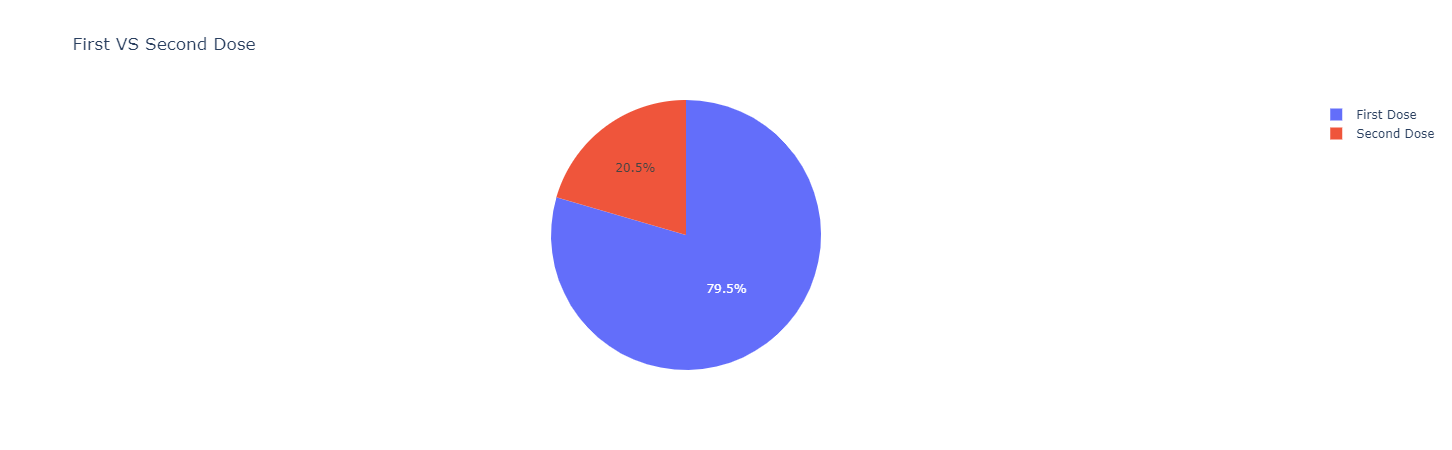

In [98]:
firstdose=df_vaccine["First Dose Administered"].iloc[135]
seconddose=df_vaccine["Second Dose Administered"].iloc[135]
px.pie(names=["First Dose","Second Dose"],values=[firstdose,seconddose],title="First VS Second Dose")

In [99]:
import seaborn as sns

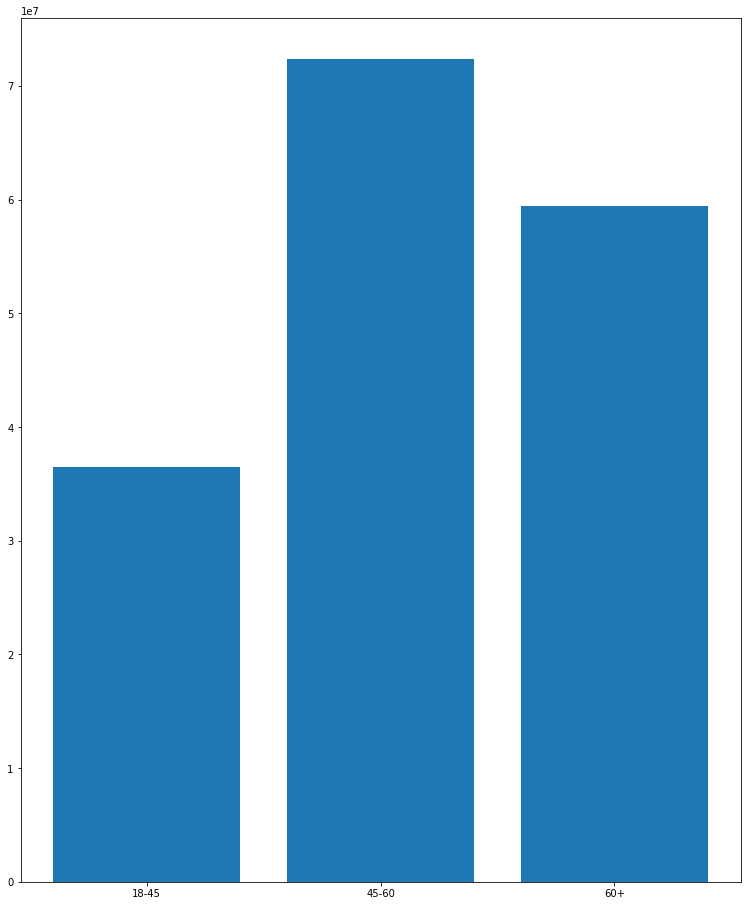

In [100]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstage=df_vaccine["18-45 years (Age)"].iloc[135]
secondage=df_vaccine["45-60 years (Age)"].iloc[135]
thirdage=df_vaccine["60+ years (Age)"].iloc[135]
ages=['18-45','45-60','60+']
vaccine=[firstage,secondage,thirdage]
ax.bar(ages,vaccine)
plt.show()

In [101]:
display(df_vaccine.iloc[2360])

Updated On                             13/03/2021
State                                   Karnataka
Total Individuals Vaccinated            1048543.0
Total Sessions Conducted                 237140.0
Total Sites                                1747.0
First Dose Administered                  723061.0
Second Dose Administered                 325482.0
Male(Individuals Vaccinated)             496703.0
Female(Individuals Vaccinated)           551696.0
Transgender(Individuals Vaccinated)         144.0
Total Covaxin Administered                 7646.0
Total CoviShield Administered           1040844.0
Total Sputnik V Administered                  NaN
AEFI                                          NaN
18-45 years (Age)                             NaN
45-60 years (Age)                             NaN
60+ years (Age)                               NaN
Total Doses Administered                1048543.0
Name: 2360, dtype: object

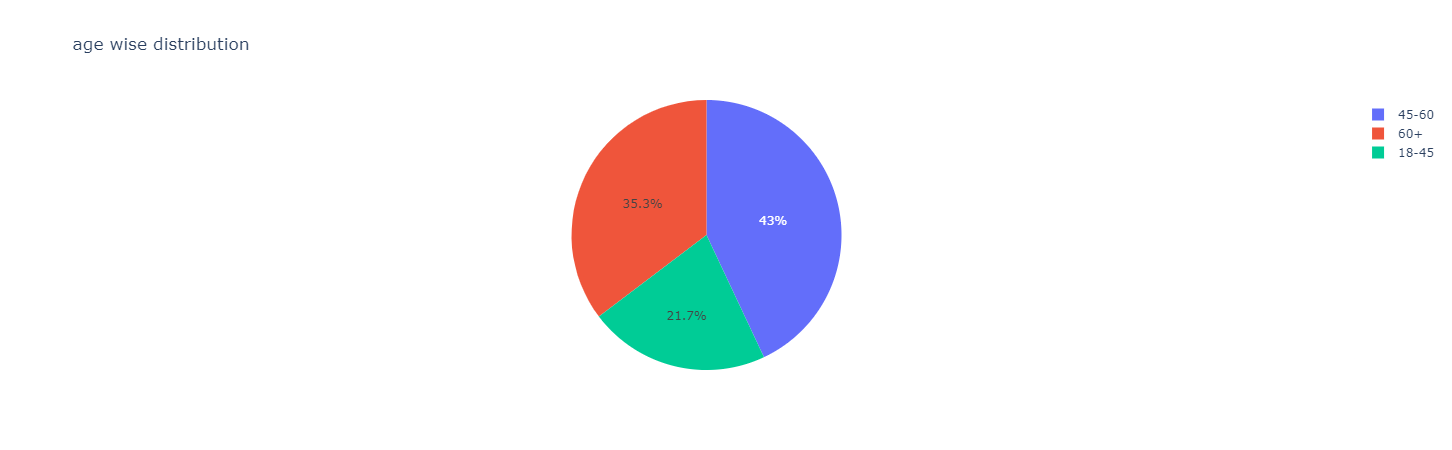

In [102]:
firstage=df_vaccine["18-45 years (Age)"].iloc[135]
secondage=df_vaccine["45-60 years (Age)"].iloc[135]
thirdage=df_vaccine["60+ years (Age)"].iloc[135]
px.pie(names=["18-45","45-60","60+"],values=[firstage,secondage,thirdage],title="age wise distribution")

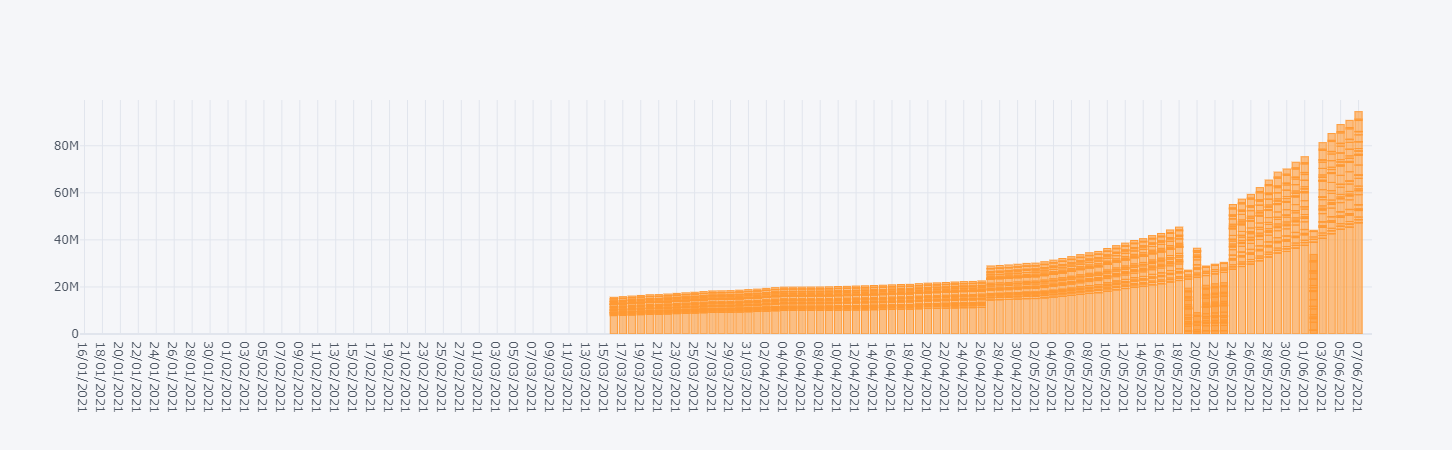

In [103]:
df_vaccine.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

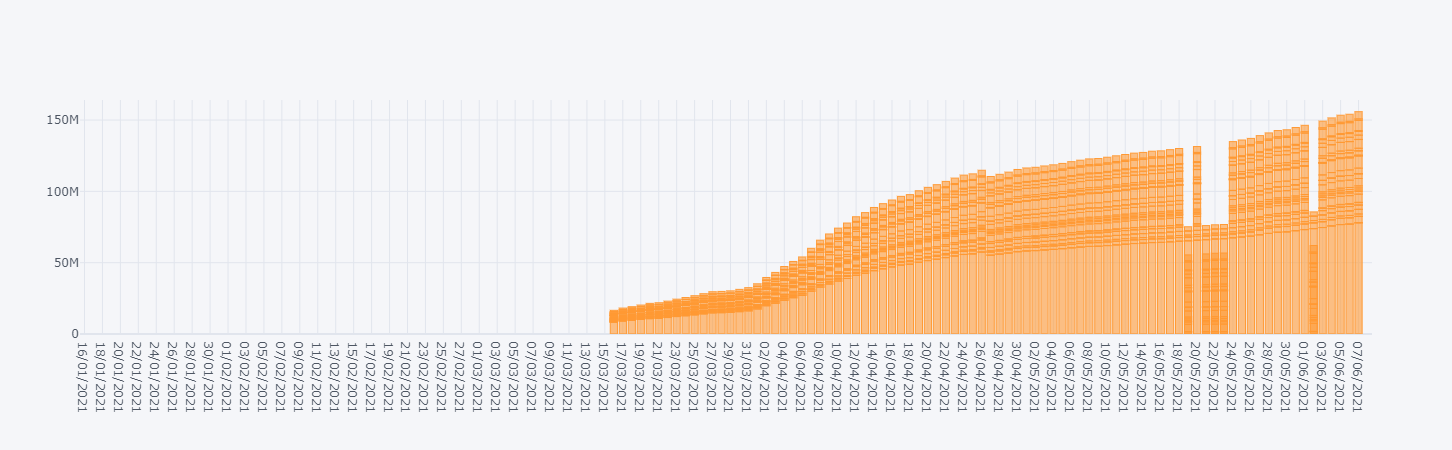

In [104]:
df_vaccine.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

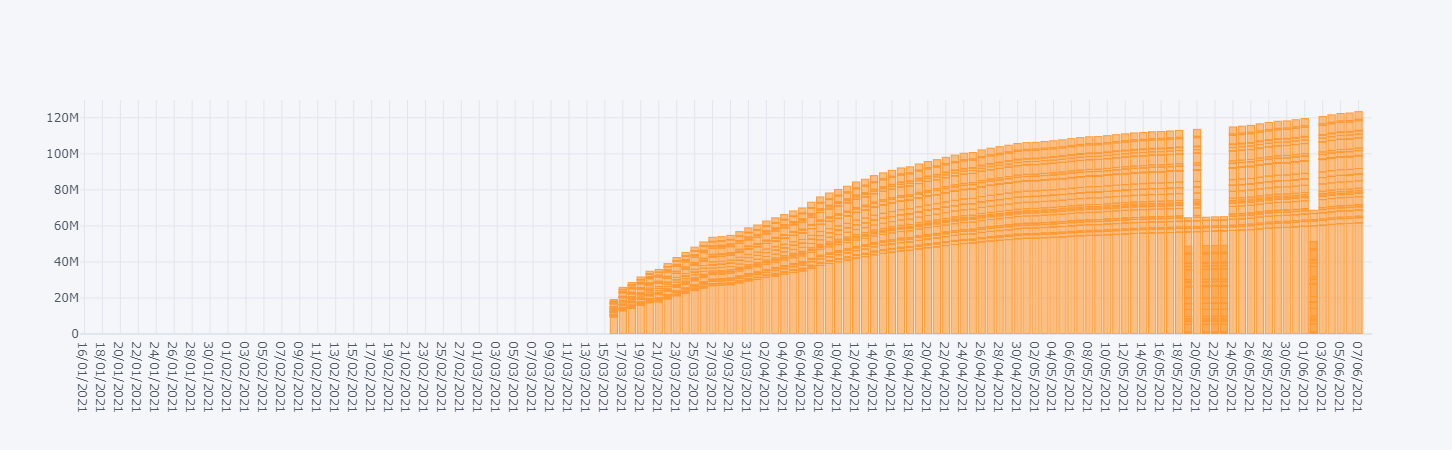

In [105]:
df_vaccine.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

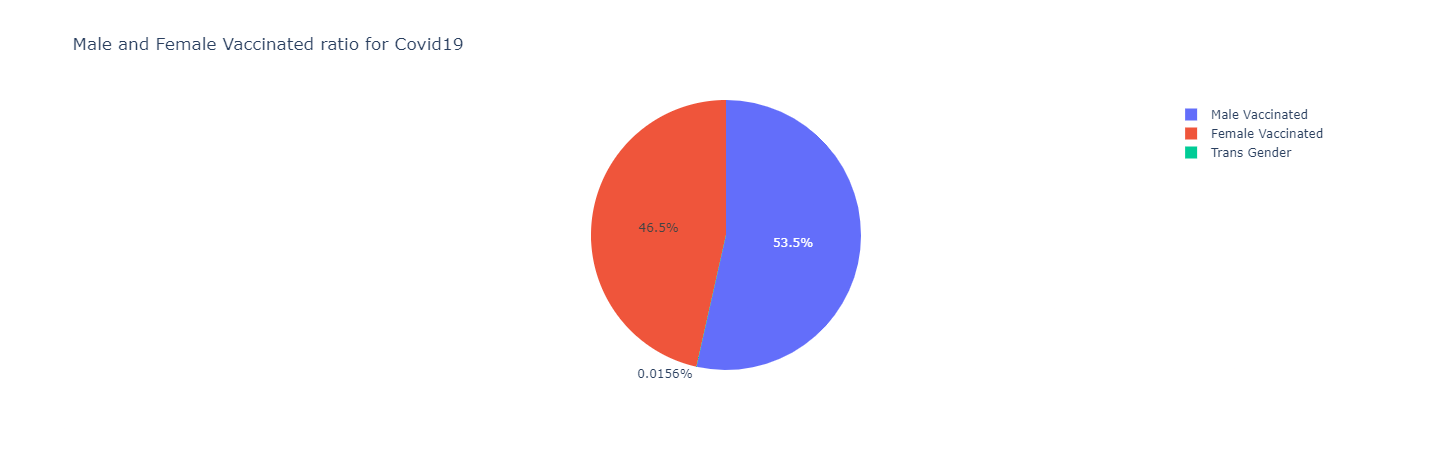

In [106]:
male = df_vaccine["Male(Individuals Vaccinated)"].iloc[135]
female = df_vaccine["Female(Individuals Vaccinated)"].iloc[135] 
trans = df_vaccine["Transgender(Individuals Vaccinated)"].iloc[135]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19")

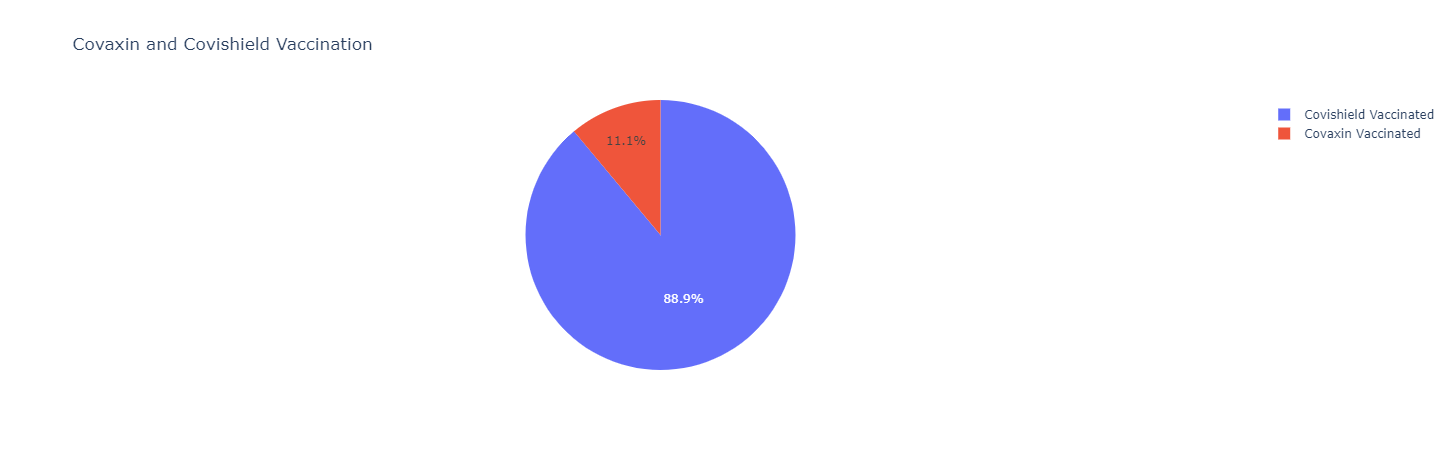

In [107]:
Covaxin = df_vaccine["Total Covaxin Administered"].iloc[135] 
Covishield = df_vaccine["Total CoviShield Administered"].iloc[135]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [108]:
df_vaccine.head(120)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,11/05/2021,India,136557345.0,7848368.0,56288.0,136557345.0,37305298.0,71722365.0,64816275.0,18705.0,17081853.0,156780790.0,NaN,20315.0,18768175.0,62460166.0,55307756.0,173862643.0
116,12/05/2021,India,137805245.0,7572978.0,54605.0,137805245.0,38240332.0,72431855.0,65354414.0,18976.0,17459811.0,158585766.0,NaN,20352.0,19307387.0,62926016.0,55549219.0,176045577.0
117,13/05/2021,India,139087590.0,7238072.0,52103.0,139087590.0,39274256.0,73161834.0,65906538.0,19218.0,17840229.0,160521617.0,NaN,20415.0,19863113.0,63401077.0,55799375.0,178361846.0
118,14/05/2021,India,139861462.0,5861579.0,42398.0,139861462.0,39784951.0,73607113.0,66234957.0,19392.0,18087664.0,161558739.0,NaN,20432.0,20255885.0,63656217.0,55924598.0,179646413.0


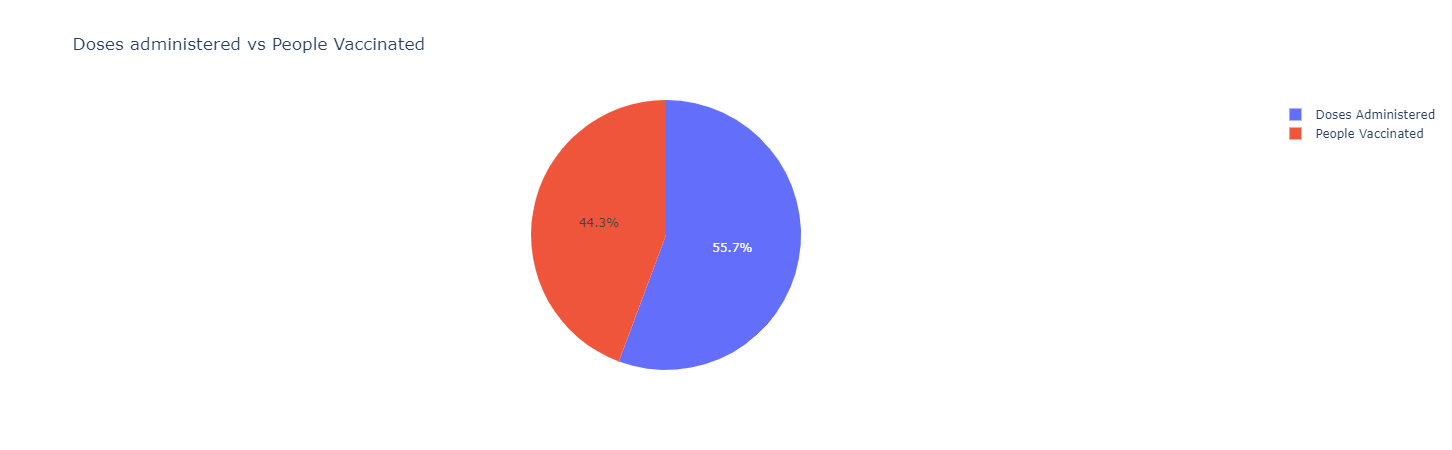

In [109]:
Doses = df_vaccine["Total Doses Administered"].iloc[135] 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].iloc[135] 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [110]:
df_vaccine.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [111]:
df_vaccine['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# Let's Analyze 3 States of How many People gets Vaccinated
# Maharashtra,Gujarat,West Bengal

In [112]:
df_Maharashtra=df_vaccine[df_vaccine['State']=='Maharashtra']
df_Gujarat=df_vaccine[df_vaccine['State']=='Gujarat']
df_WestBengal=df_vaccine[df_vaccine['State']=='West Bengal']

In [113]:
df_Maharashtra.tail()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
3163,04/06/2021,Maharashtra,18959397.0,1245247.0,4606.0,18959397.0,4728102.0,10171294.0,8785443.0,2660.0,2901616.0,20785883.0,0.0,3970.0,3751630.0,8320220.0,6880500.0,23687499.0
3164,05/06/2021,Maharashtra,19278027.0,1178249.0,4169.0,19278027.0,4771520.0,10347927.0,8927387.0,2713.0,2944627.0,21104916.0,4.0,3976.0,3914131.0,8419751.0,6936344.0,24049547.0
3165,06/06/2021,Maharashtra,19360252.0,572555.0,1665.0,19360252.0,4785180.0,10392910.0,8964619.0,2723.0,2954409.0,21190978.0,45.0,3976.0,3974009.0,8434398.0,6943523.0,24145432.0
3166,07/06/2021,Maharashtra,19597498.0,1105629.0,4274.0,19597498.0,4852866.0,10524604.0,9070141.0,2753.0,3012896.0,21437286.0,182.0,3992.0,4099403.0,8506028.0,6982959.0,24450364.0
3167,08/06/2021,Maharashtra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
display(df_Maharashtra.iloc[135])

Updated On                              31/05/2021
State                                  Maharashtra
Total Individuals Vaccinated            18016877.0
Total Sessions Conducted                  976894.0
Total Sites                                 4069.0
First Dose Administered                 18016877.0
Second Dose Administered                 4569743.0
Male(Individuals Vaccinated)             9651880.0
Female(Individuals Vaccinated)           8362542.0
Transgender(Individuals Vaccinated)         2455.0
Total Covaxin Administered               2732312.0
Total CoviShield Administered           19854308.0
Total Sputnik V Administered                   0.0
AEFI                                        3952.0
18-45 years (Age)                        3254156.0
45-60 years (Age)                        8040667.0
60+ years (Age)                          6716914.0
Total Doses Administered                22586620.0
Name: 3159, dtype: object

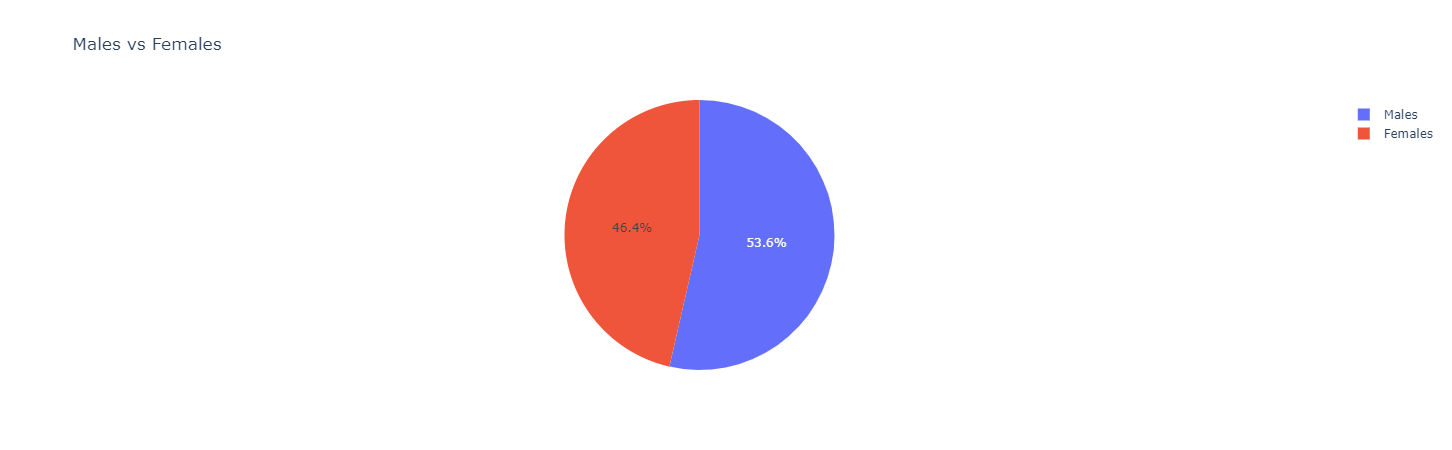

In [115]:
male=df_Maharashtra["Male(Individuals Vaccinated)"].iloc[135]
female=df_Maharashtra["Female(Individuals Vaccinated)"].iloc[135]
px.pie(names=["Males","Females"],values=[male,female],title="Males vs Females")



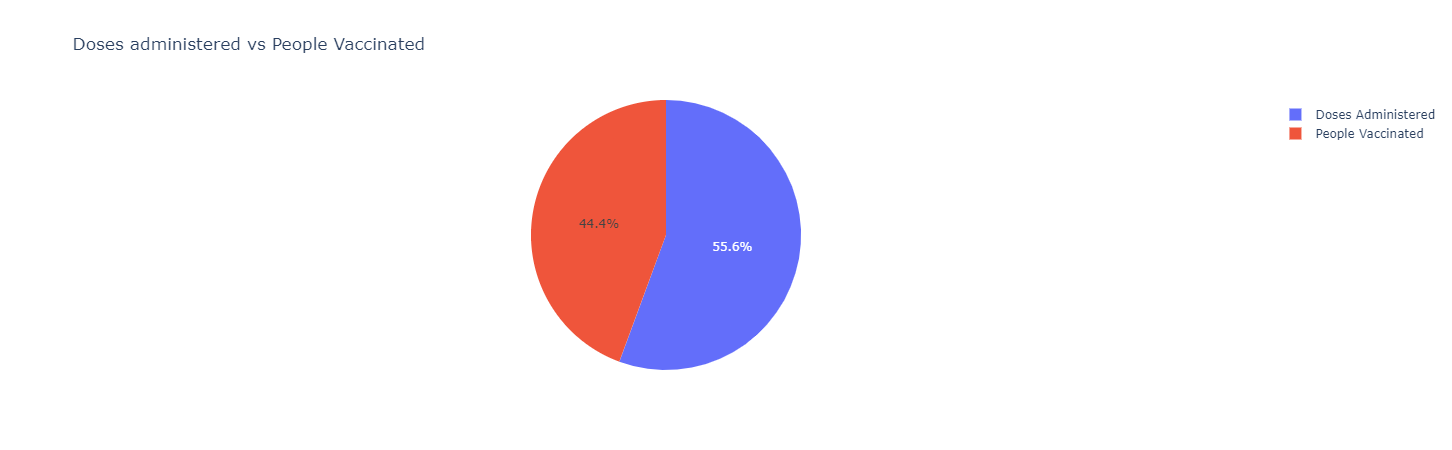

In [116]:
Doses = df_Maharashtra["Total Doses Administered"].iloc[135]
Vaccinated = df_Maharashtra["Total Individuals Vaccinated"].iloc[135]
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [117]:
df_Gujarat.tail(135)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
1593,25/01/2021,Gujarat,62496.0,2019.0,1005.0,62496.0,0.0,26549.0,35944.0,3.0,35.0,62461.0,NaN,NaN,NaN,NaN,NaN,62496.0
1594,26/01/2021,Gujarat,62729.0,2188.0,1094.0,62729.0,0.0,26666.0,36060.0,3.0,38.0,62691.0,NaN,NaN,NaN,NaN,NaN,62729.0
1595,27/01/2021,Gujarat,68817.0,3411.0,1859.0,68817.0,0.0,29135.0,39679.0,3.0,36.0,68781.0,NaN,NaN,NaN,NaN,NaN,68817.0
1596,28/01/2021,Gujarat,132621.0,4847.0,2411.0,132621.0,0.0,51456.0,81152.0,13.0,71.0,132550.0,NaN,NaN,NaN,NaN,NaN,132621.0
1597,29/01/2021,Gujarat,187038.0,5520.0,2523.0,187038.0,0.0,68265.0,118753.0,20.0,77.0,186961.0,NaN,NaN,NaN,NaN,NaN,187038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,04/06/2021,Gujarat,13674583.0,512778.0,2329.0,13674583.0,4261488.0,7358698.0,6314033.0,1852.0,2132268.0,15803803.0,0.0,1002.0,3625807.0,5665388.0,4380386.0,17936071.0
1724,05/06/2021,Gujarat,13915183.0,479610.0,2224.0,13915183.0,4286032.0,7500857.0,6412426.0,1900.0,2154329.0,16046886.0,0.0,1004.0,3826189.0,5695899.0,4390036.0,18201215.0
1725,06/06/2021,Gujarat,14128072.0,444175.0,2087.0,14128072.0,4299619.0,7623531.0,6502596.0,1945.0,2181397.0,16246294.0,0.0,1005.0,4009695.0,5718114.0,4397135.0,18427691.0
1726,07/06/2021,Gujarat,14359541.0,490969.0,2246.0,14359541.0,4326975.0,7755563.0,6601968.0,2010.0,2205473.0,16481043.0,0.0,1007.0,4200747.0,5748149.0,4407463.0,18686516.0


In [118]:
display(df_Gujarat.iloc[135])

Updated On                             31/05/2021
State                                     Gujarat
Total Individuals Vaccinated           12965663.0
Total Sessions Conducted                 385100.0
Total Sites                                1857.0
First Dose Administered                12965663.0
Second Dose Administered                4144956.0
Male(Individuals Vaccinated)            6954068.0
Female(Individuals Vaccinated)          6009885.0
Transgender(Individuals Vaccinated)        1710.0
Total Covaxin Administered              2027524.0
Total CoviShield Administered          15083095.0
Total Sputnik V Administered                  0.0
AEFI                                        994.0
18-45 years (Age)                       3102409.0
45-60 years (Age)                       5526556.0
60+ years (Age)                         4333882.0
Total Doses Administered               17110619.0
Name: 1719, dtype: object

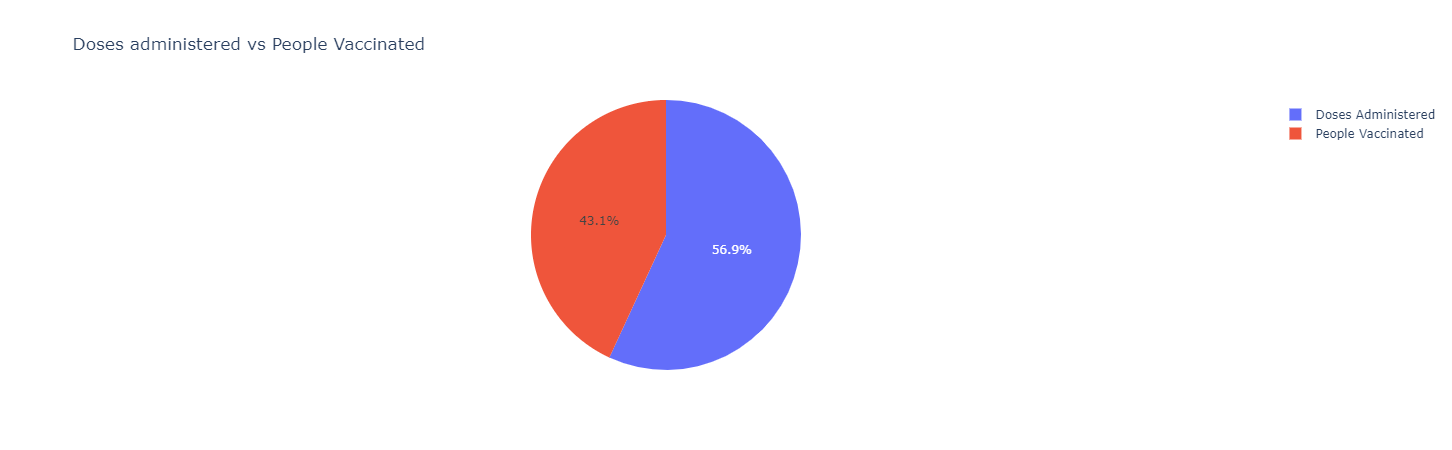

In [119]:
Doses = df_Gujarat["Total Doses Administered"].iloc[135] 
Vaccinated = df_Gujarat["Total Individuals Vaccinated"].iloc[135] 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [120]:
display(df_WestBengal.iloc[135])

Updated On                              31/05/2021
State                                  West Bengal
Total Individuals Vaccinated            10838457.0
Total Sessions Conducted                  839415.0
Total Sites                                 2511.0
First Dose Administered                 10838457.0
Second Dose Administered                 3879678.0
Male(Individuals Vaccinated)             6050228.0
Female(Individuals Vaccinated)           4786796.0
Transgender(Individuals Vaccinated)         1433.0
Total Covaxin Administered               1650999.0
Total CoviShield Administered           13067136.0
Total Sputnik V Administered                   0.0
AEFI                                        1144.0
18-45 years (Age)                        2402085.0
45-60 years (Age)                        4469534.0
60+ years (Age)                          3964698.0
Total Doses Administered                14718135.0
Name: 5319, dtype: object

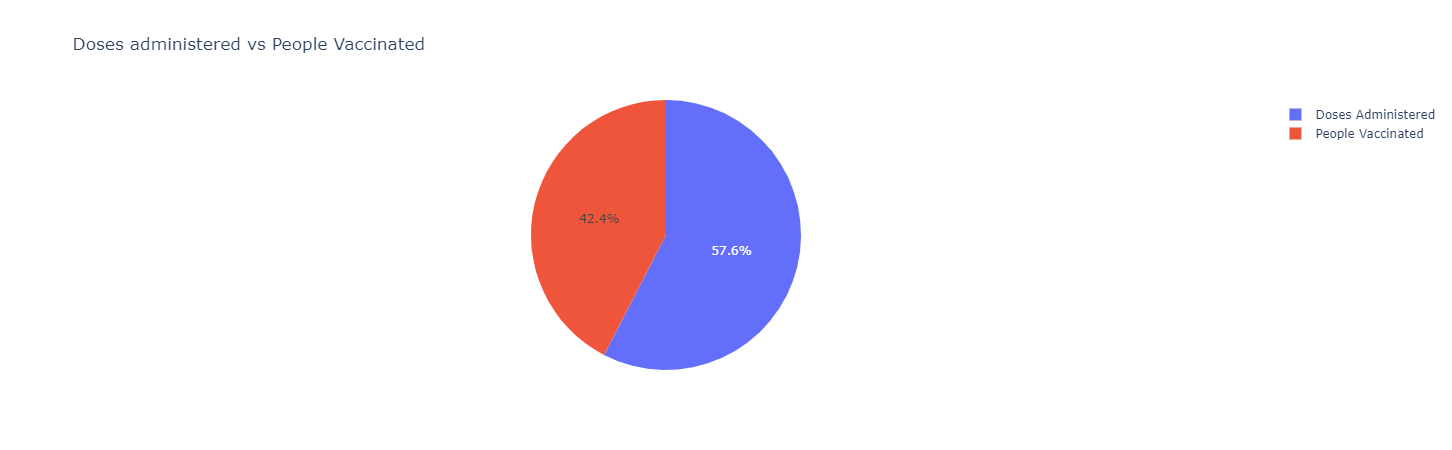

In [121]:
Doses = df_WestBengal["Total Doses Administered"].iloc[135]
Vaccinated = df_WestBengal["Total Individuals Vaccinated"].iloc[135]
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

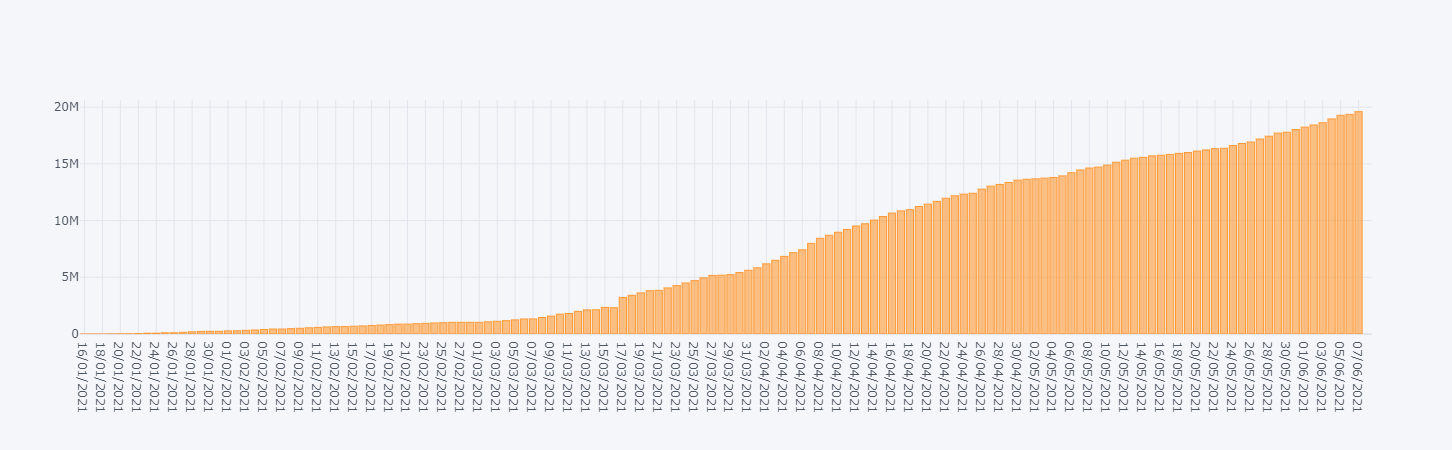

In [127]:
df_Maharashtra.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

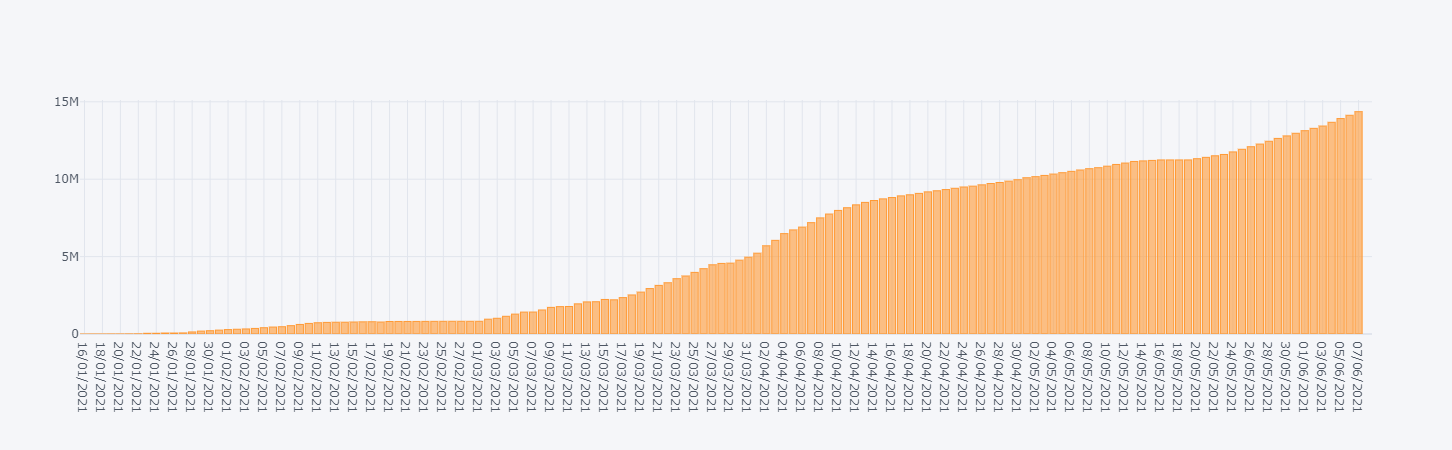

In [128]:
df_Gujarat.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [129]:
df_WestBengal.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

**Statewise ranking of states based on Complete dossage**************

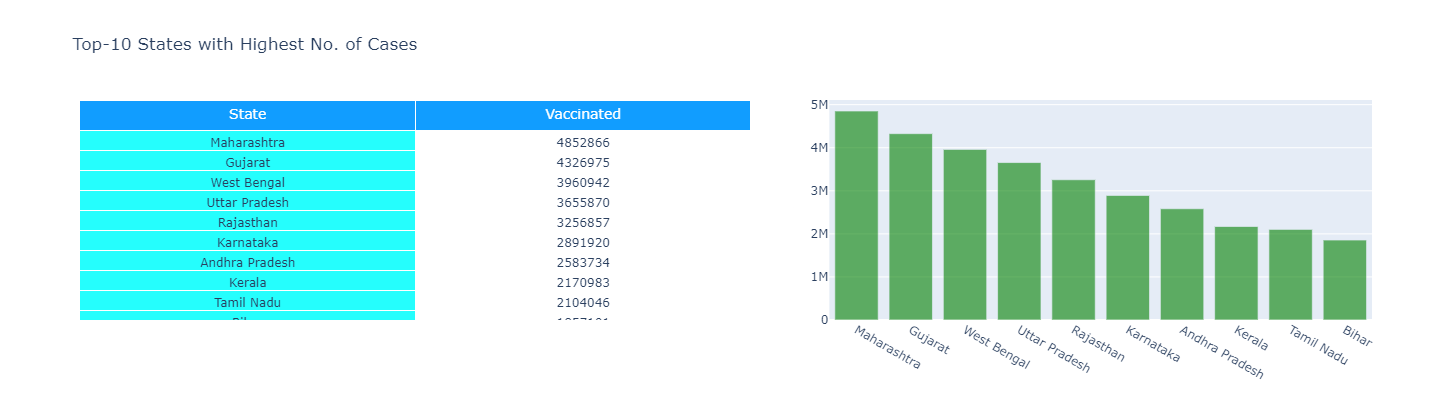

In [125]:
top_10=df_vaccine.groupby('State')['Second Dose Administered'].max().drop("India").sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State","Vaccinated"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State'].head(10),top_10['Second Dose Administered'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State'].head(10),
                y=top_10['Second Dose Administered'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='green'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest No. of Cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)